# Use CDF to Calculate Probabilities (Practice)
We will use the human height data set:

Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

1. between 55.0 and 56.0 inches

2. is less than 5 feet (60 in)

3. is greater than the mean (hint: do you know this answer intuitively?)

## imports and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('/Users/steve/Documents/GitHub/CDF-Probabilities/Data/weight-height - weight-height.csv')
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

In [3]:
# define variable for data of interest
data = females['Height']

### 1. between 55.0 and 56.0 inches

In [4]:
# set the lower and upper values
low_end = 55.0
high_end = 56.0

In [6]:
# define statistics of the data
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

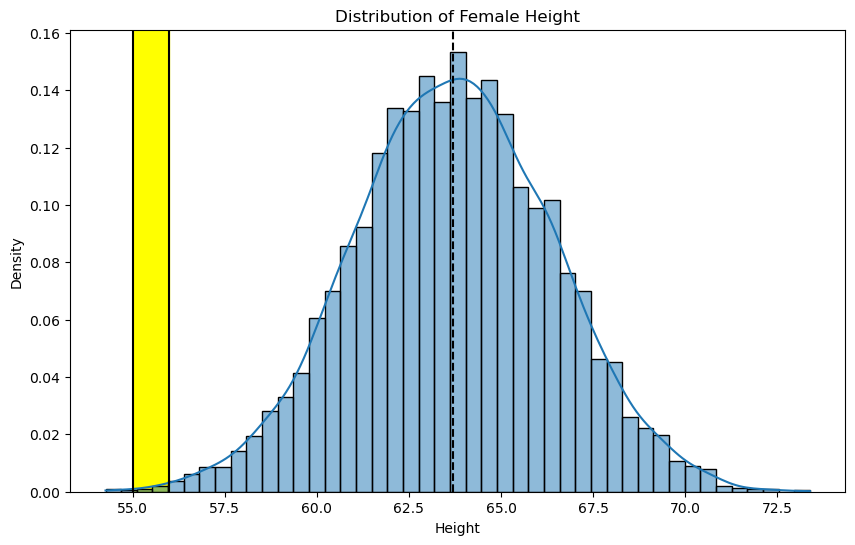

In [8]:
# visualize the area/probability of interest with a probability distribution functions
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvline(mean,color='k',ls='--');
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

In [9]:
# Set the range and spacing for our normal curve
x_range = np.linspace(min, max,1000)

In [10]:
# create the normal curve using the data mean and standard deviation
pdf = stats.norm.pdf(x_range, loc=mean, scale=std)

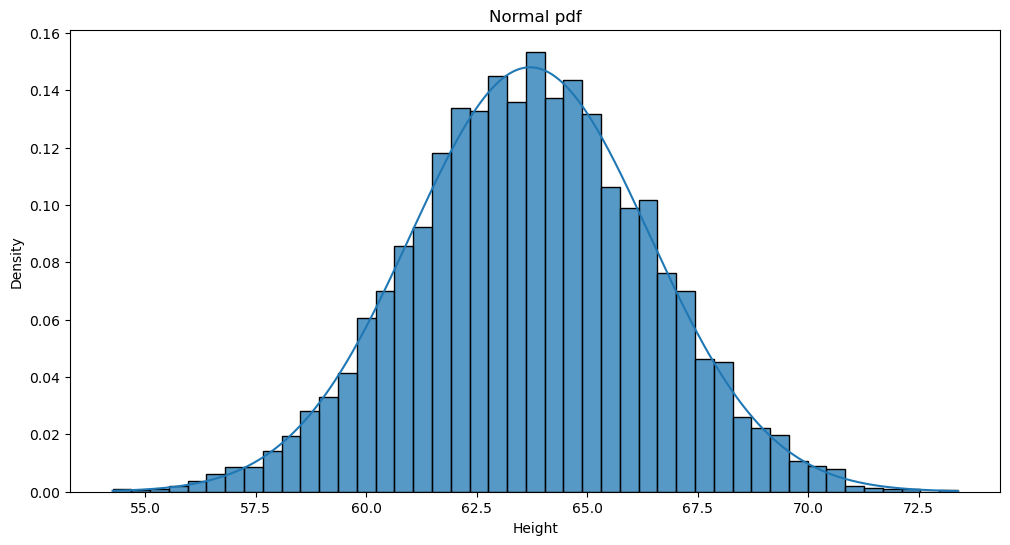

In [11]:
# plot data with normal cdf
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density')
ax.plot(x_range,pdf)
ax.set_title('Normal pdf');

In [13]:
# create the cdf
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

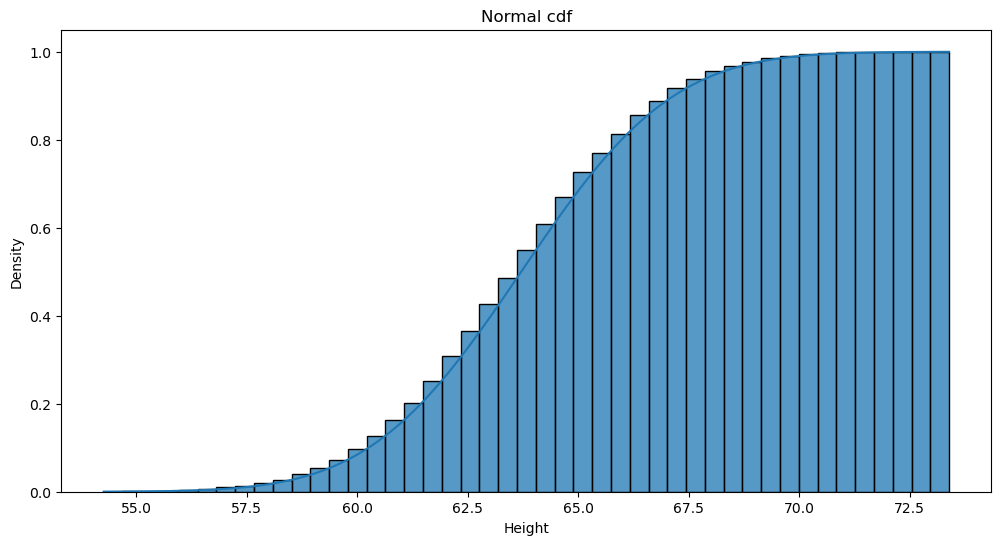

In [14]:
# plot the cdf
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.set_title('Normal cdf');

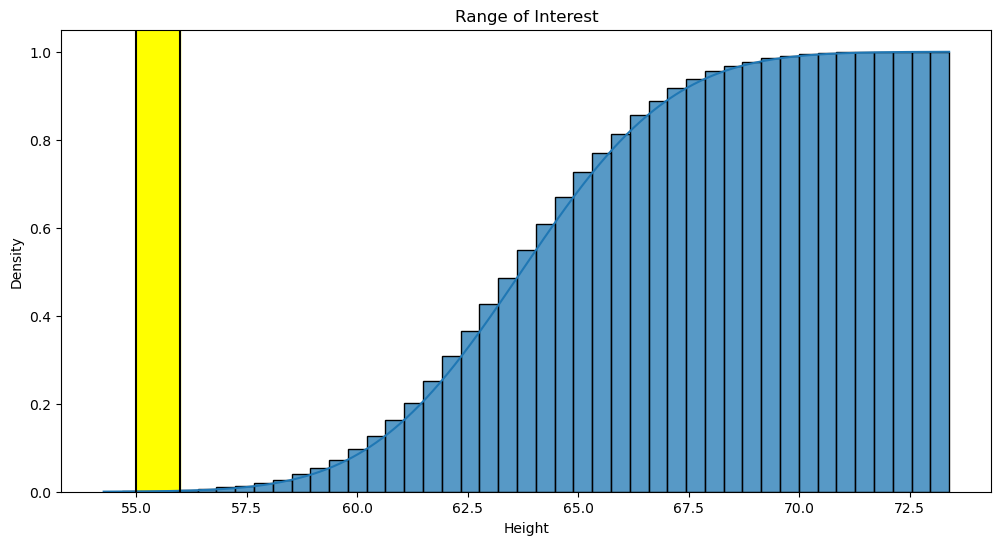

In [15]:
# visualize the area between 55 and 56 with the cdf plot
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

In [16]:
## subtract cumulative areas to find the probability of a value occurring in the range 55 to 56
stats.norm.cdf(high_end, loc=mean,scale=std) - stats.norm.cdf(low_end,loc=mean, scale=std)

0.0015043054289559897

#### The probability of a female height falling between 55 and 56 inches is 0.0015 or .15 percent.

### 2. is less than 5 feet (60 in)

In [17]:
# calculate the cumulative probability for 60 inches
stats.norm.cdf(60, loc=mean, scale=std)

0.08446492725207488

#### The probability of a female height less than 5 feet (60 inches) is 0.0845 or 8.45 percent.

### 3. is greater than the mean (This should result in 50 percent.)

In [18]:
# calculate the cumulative probability for the mean and subtract it from 1
1 - stats.norm.cdf(mean, loc=mean, scale=std)

0.5

#### The probability of a height greater than the mean is 0.5 or 50 percent.  